In [2]:
# 설치 및 기본설정
!pip install darts[all] --quiet

# 데이터 업로드 및 전처리
import pandas as pd
from darts import TimeSeries

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("고용지표.csv")
df = df.drop(index=0).reset_index(drop=True)
df['시점'] = df['시점'].str.replace(' ', '').str.replace('.', '-') + '-01'
df['시점'] = pd.to_datetime(df['시점'], format='%Y-%m-%d')
for col in ['고용률', '실업률', '경제활동참가율']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.set_index('시점')[['고용률', '실업률', '경제활동참가율']].dropna()

Saving 고용지표.csv to 고용지표.csv


In [3]:
# TimeSeries 객체로 변환
from darts import TimeSeries

ts_employ = TimeSeries.from_series(df['고용률'])
ts_unemp = TimeSeries.from_series(df['실업률'])
ts_partic = TimeSeries.from_series(df['경제활동참가율'])

In [4]:
# 훈련 / 검증 데이터 분할
train, val = ts_employ[:-3], ts_employ[-3:]

In [5]:
# TiDE 모델 학습 및 예측
from darts.models import TiDEModel

model = TiDEModel(
    input_chunk_length=12,
    output_chunk_length=3,
    n_epochs=300,
    random_state=42
)

model.fit(train, verbose=True)
pred = model.predict(n=3)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | criterion        | MSELoss          | 0      | train
1 | train_criterion  | MSELoss          | 0      | train
2 | val_criterion    | MSELoss          | 0      | train
3 | train_metrics    | MetricCollection | 0      | train
4 | val_metrics      | MetricCollection | 0      | train
5 | encoders         | Sequential       | 19.8 K | train
6 | decoders         | Sequential       | 28.9 K | train
7 | temporal_decoder | _ResidualBlock   | 594    | train
8 | lookback_skip    | Linear           | 39    

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

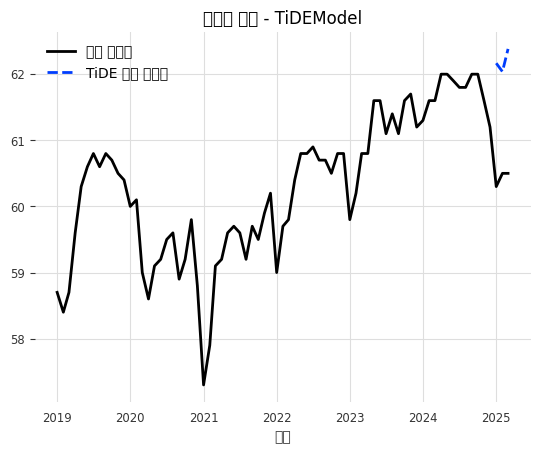

MAPE: 2.92%


In [6]:
# 시각화 및 평가
import matplotlib.pyplot as plt
from darts.metrics import mape

ts_employ.plot(label="실제 고용률")
pred.plot(label="TiDE 예측 고용률", linestyle="--")
plt.legend()
plt.grid(True)
plt.title("고용률 예측 - TiDEModel")
plt.show()

print(f"MAPE: {mape(val, pred):.2f}%")


In [7]:
# 실업률
train_u, val_u = ts_unemp[:-3], ts_unemp[-3:]
model.fit(train_u)
pred_u = model.predict(n=3)
print(f"실업률 MAPE: {mape(val_u, pred_u):.2f}%")

# 참가율
train_p, val_p = ts_partic[:-3], ts_partic[-3:]
model.fit(train_p)
pred_p = model.predict(n=3)
print(f"경제활동참가율 MAPE: {mape(val_p, pred_p):.2f}%")


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | criterion        | MSELoss          | 0      | train
1 | train_criterion  | MSELoss          | 0      | train
2 | val_criterion    | MSELoss          | 0      | train
3 | train_metrics    | MetricCollection | 0      | train
4 | val_metrics      | MetricCollection | 0      | train
5 | encoders         | Sequential       | 19.8 K | train
6 | decoders         | Sequential       | 28.9 K | train
7 | temporal_decoder | _ResidualBlock   | 594    | train
8 | lookback_skip    | Linear           | 39    

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | criterion        | MSELoss          | 0      | train
1 | train_criterion  | MSELoss          | 0      | train
2 | val_criterion    | MSELoss          | 0      | train
3 | train_metrics    | MetricCollection | 0      | train
4 | val_metrics      | MetricCollection | 0      | train
5 | encoders         | Sequential       | 19.8 K | train
6 | decoders         | Sequential       | 28.9 K | train
7 | temporal_decoder | _ResidualBlock   | 594    | train
8 | lookback_skip    | Linear           | 39    

실업률 MAPE: 3.66%


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

경제활동참가율 MAPE: 0.60%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

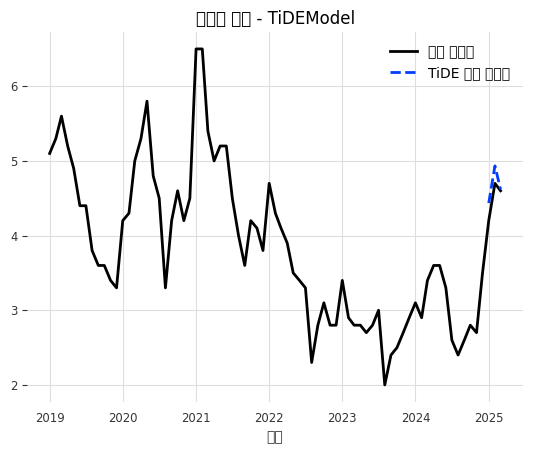

In [8]:
# 실업률 시각화
ts_unemp.plot(label="실제 실업률")
pred_u.plot(label="TiDE 예측 실업률", linestyle="--")
plt.legend()
plt.grid(True)
plt.title("실업률 예측 - TiDEModel")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

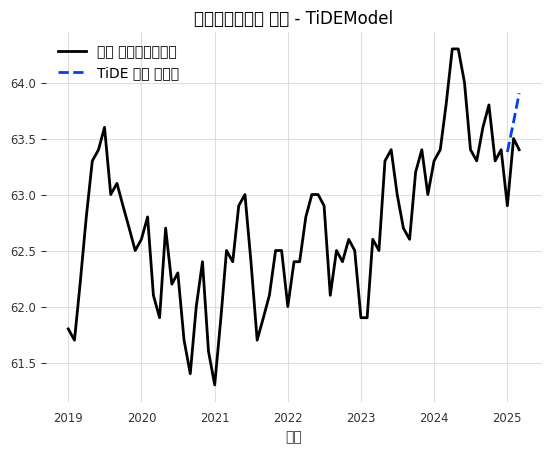

In [9]:
# 참가율 시각화
ts_partic.plot(label="실제 경제활동참가율")
pred_p.plot(label="TiDE 예측 참가율", linestyle="--")
plt.legend()
plt.grid(True)
plt.title("경제활동참가율 예측 - TiDEModel")
plt.show()


In [ ]:
#TiDE 모델을 활용한 고용지표 예측 결과, 전반적으로 안정적인 예측 성능을 보였다.
#고용률의 MAPE는 2.92%로 낮은 오차율을 기록하였으며, 이는 단기적 추세 파악에 TiDE 모델이 효과적임을 나타낸다.
#경제활동참가율 또한 MAPE가 0.6%로 매우 낮아, 예측 신뢰도가 높은 지표로 평가된다.
#반면, 실업률 예측에서는 MAPE가 3.66%로 상대적으로 높았지만 여전히 수용 가능한 수준이다.
#이는 실업률 데이터가 타 지표보다 노이즈가 많거나 변동성이 크기 때문일 수 있다.
#TiDE는 비선형성과 시간 패턴을 효과적으로 반영하는 구조를 가지고 있어, 다변량 시계열 예측에 강점을 가진다.
#DLinear 대비 TiDE의 MAPE는 대부분의 지표에서 조금 높았으나, 실업률에서는 오히려 TiDE가 더 정확한 예측을 보여주었다.
#이는 TiDE가 보다 복잡한 시계열 패턴을 포착하는 데 유리하다는 점을 시사한다.
#전반적으로 TiDE 모델은 고용지표 중에서도 특히 참가율과 실업률 예측에 적합한 성능을 보였다.